In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, auc

# Regresión Logística

## Titanic
Vamos a crear un modelo que prediga la probabilidad de supervivencia de los pasajeros. Los datos están disponibles en:

https://www.kaggle.com/c/titanic/data?select=train.csv

0. Importar data de training y testing. Agregarle a la tabla de testing la columna survived proveniente de la tabla gender_submission

In [6]:
training = pd.read_csv('train.csv', sep=',')

In [8]:
testing = pd.read_csv('test.csv', sep=',')

In [10]:
gendersub = pd.read_csv('gender_submission.csv', sep=',')

In [12]:
training.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [14]:
testing.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [16]:
gendersub.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [18]:
testing['Survived'] = testing['PassengerId'].map(gendersub.set_index('PassengerId')['Survived'])

In [20]:
testing.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1


1. Buscar columnas con valores nulos y cantidad de nulos en cada una. Fijarse el porcentaje de los datos nulos que representan sobre el total.

In [23]:
tnulos = training.isnull().sum()
tnulos

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [25]:
filas = training.shape[0]
porcentaje_tnulos = ((tnulos / filas) * 100).round(2)
porcentaje_tnulos

PassengerId     0.00
Survived        0.00
Pclass          0.00
Name            0.00
Sex             0.00
Age            19.87
SibSp           0.00
Parch           0.00
Ticket          0.00
Fare            0.00
Cabin          77.10
Embarked        0.22
dtype: float64

In [27]:
enulos = testing.isnull().sum()
enulos

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Survived         0
dtype: int64

In [29]:
porcentaje_enulos = (enulos / len(testing)) * 100
porcentaje_enulos

PassengerId     0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            20.574163
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.239234
Cabin          78.229665
Embarked        0.000000
Survived        0.000000
dtype: float64

2. En base al resultado anterior. ¿Cuales columnas consideran que tienen sentido completar y cuales se deberían eliminar? Eliminar la que corresponda de la tabla de test y de train.

In [32]:
training.drop(columns=['Cabin'], inplace=True)
testing.drop(columns=['Cabin'], inplace=True)

In [34]:
training.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [36]:
testing.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,1


3. Completar valores nulos con el criterio que considres correcto en cada una de las columnas (que tengan sentido completar). Esto debe hacerse tanto en la tabla de training como la de testing (con el mismo criterio en ambas).

   Verificar cómo se distribuyen los valores de cada columna con un gráfico previamente para tener más herramientas en la decisión

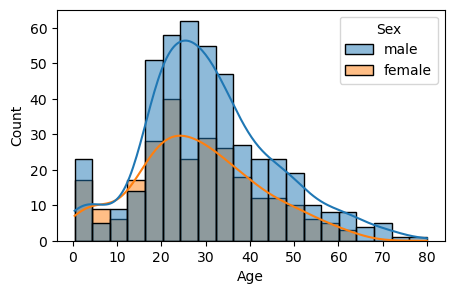

In [48]:
plt.figure(figsize=(5, 3))
sns.histplot(data=training, x="Age", hue="Sex", bins=20, kde=True, color="blue")
plt.show()

In [46]:
training.groupby(["Sex", "Pclass"])["Age"].median()

Sex     Pclass
female  1         35.0
        2         28.0
        3         21.5
male    1         40.0
        2         30.0
        3         25.0
Name: Age, dtype: float64

In [64]:
training["Age"] = training["Age"].fillna(training.groupby(["Sex", "Pclass"])["Age"].transform("median"))

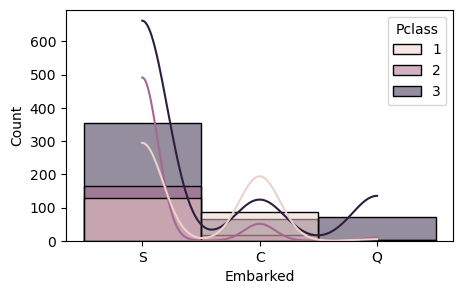

In [66]:
plt.figure(figsize=(5, 3))
sns.histplot(data=training, x="Embarked", hue="Pclass", bins=20, kde=True, color="blue")
plt.show()

In [68]:
training.Embarked.describe()

count     891
unique      3
top         S
freq      646
Name: Embarked, dtype: object

In [70]:
training["Embarked"].unique() # Titanic: S = Southampton, C = Cherbourg, Q = Queenstown).

array(['S', 'C', 'Q'], dtype=object)

In [72]:
training["Embarked"].mode()

0    S
Name: Embarked, dtype: object

In [74]:
# mode()[0] obtiene el valor más frecuente en la columna
training["Embarked"] = training["Embarked"].fillna(training["Embarked"].mode()[0])

In [76]:
training.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

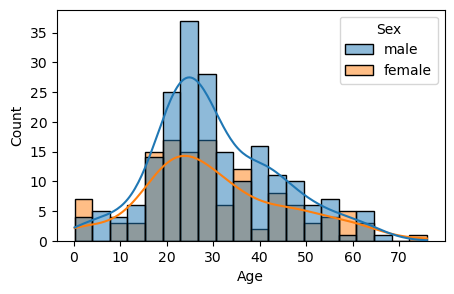

In [78]:
plt.figure(figsize=(5, 3))
sns.histplot(data=testing, x="Age", hue="Sex", bins=20, kde=True, color="blue")
plt.show()

In [80]:
testing["Age"] = testing["Age"].fillna(testing.groupby(["Sex", "Pclass"])["Age"].transform("median"))
testing["Embarked"] = testing["Embarked"].fillna(testing["Embarked"].mode()[0])

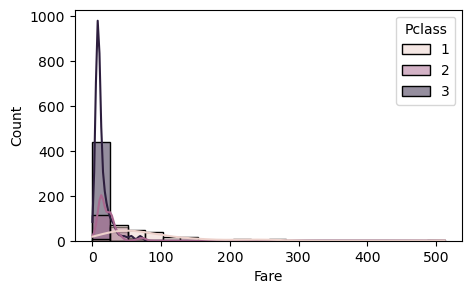

In [82]:
plt.figure(figsize=(5, 3))
sns.histplot(data=training, x="Fare", hue="Pclass", bins=20, kde=True, color="blue")
plt.show()

In [84]:
training.groupby(["Sex", "Pclass"])["Fare"].mean()

Sex     Pclass
female  1         106.125798
        2          21.970121
        3          16.118810
male    1          67.226127
        2          19.741782
        3          12.661633
Name: Fare, dtype: float64

In [86]:
testing["Fare"] = testing["Fare"].fillna(testing.groupby(["Sex", "Pclass"])["Fare"].transform("mean"))

In [88]:
testing.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Survived       0
dtype: int64

4. Realizar análisis exploratorio. Graficar las personas que sobrevivieron por:
    - Clase (Pclass)
    - Sexo (Sex)
    - Costo de boleto (Fare)

In [90]:
training.groupby(["Sex", "Pclass","Fare"])["Survived"].sum()

Sex     Pclass  Fare   
female  1       25.9292    2
                26.2833    1
                26.5500    1
                27.7208    1
                28.7125    0
                          ..
male    3       34.3750    0
                39.6875    0
                46.9000    0
                56.4958    5
                69.5500    0
Name: Survived, Length: 357, dtype: int64

In [92]:
df = training.groupby(["Sex", "Pclass", "Fare"])["Survived"].sum().reset_index()

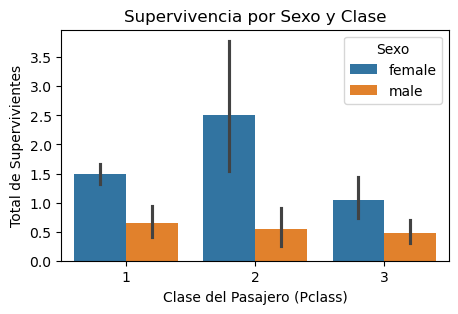

In [94]:
plt.figure(figsize=(5, 3))
sns.barplot(data=df, x="Pclass", y="Survived", hue="Sex")
plt.title("Supervivencia por Sexo y Clase")
plt.xlabel("Clase del Pasajero (Pclass)")
plt.ylabel("Total de Supervivientes")
plt.legend(title="Sexo")
plt.show()

In [77]:
# Dividir Fare en 3 cuartiles automáticos
training["Fare_Group"] = pd.qcut(training["Fare"], q=3, labels=["Bajo", "Medio", "Alto"])

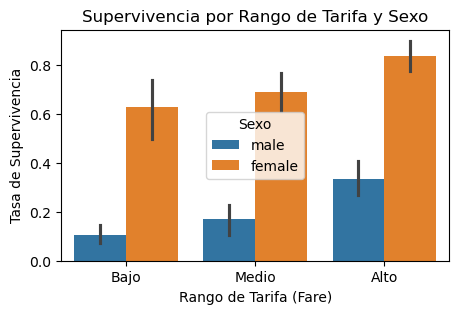

In [79]:
plt.figure(figsize=(5, 3))
sns.barplot(data=training, x="Fare_Group", y="Survived", hue="Sex")
plt.title("Supervivencia por Rango de Tarifa y Sexo")
plt.xlabel("Rango de Tarifa (Fare)")
plt.ylabel("Tasa de Supervivencia")
plt.legend(title="Sexo")
plt.show()

<Axes: xlabel='Pclass', ylabel='count'>

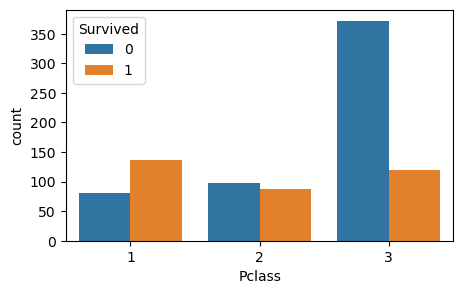

In [98]:
plt.figure(figsize=(5, 3))
sns.countplot(data = training, x='Pclass', hue='Survived')

<Axes: xlabel='Sex', ylabel='count'>

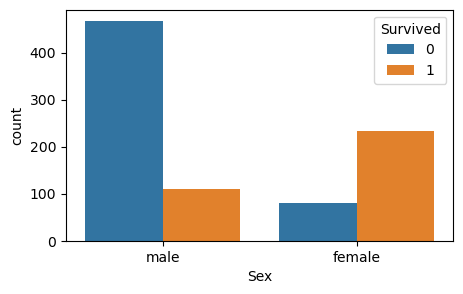

In [100]:
plt.figure(figsize=(5, 3))
sns.countplot(data = training, x='Sex', hue='Survived')

(0.0, 100.0)

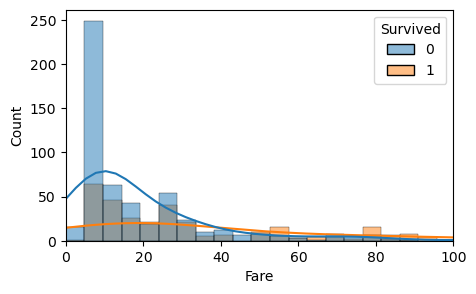

In [108]:
plt.figure(figsize=(5, 3))
sns.histplot(data = training, x='Fare', hue='Survived', kde=True)
plt.xlim(0,100)

(0.0, 80.0)

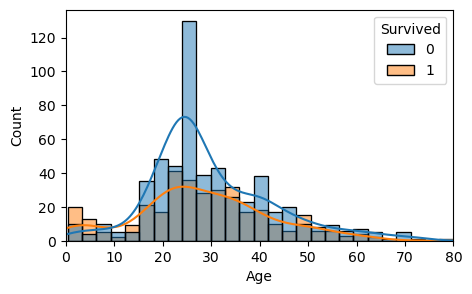

In [112]:
plt.figure(figsize=(5, 3))
sns.histplot(data = training, x='Age', hue='Survived', kde=True)
plt.xlim(0,80)

5. Verificar columnas del DataFrame e identificar sobre cúales se deberían generar variables dummies.
   Generar columnas de dummies sobre "Pclass","Embarked" y "Sex". Aplicar cambios en training y testing.

In [116]:
training.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

In [118]:

X_train = training.loc[:,training.columns!="Survived"] 
X_test = testing.loc[:,testing.columns!="Survived"] 
y_train = training.loc[:,"Survived"] 
y_test = testing.loc[:,"Survived"]


In [120]:
X_train.shape

(891, 10)

In [122]:
X_train.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [124]:
y_train.unique()

array([0, 1], dtype=int64)

In [126]:
X_train['Pclass'].unique()

array([3, 1, 2], dtype=int64)

In [128]:
X_train['Sex'].unique()

array(['male', 'female'], dtype=object)

In [130]:
X_train['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [132]:
 # sibsp No. de hermanos/cónyuges a bordo del Titanic
 # parch No. de padres/hijos a bordo del Titanic

In [134]:
X_train = pd.get_dummies(
    X_train, 
    columns=["Pclass","Embarked","Sex"],
    drop_first = True
)

X_test = pd.get_dummies(
    X_test, 
    columns=["Pclass","Embarked","Sex"],
    drop_first = True
)

In [149]:
X_train.columns

Index(['PassengerId', 'Name', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Pclass_2', 'Pclass_3', 'Embarked_Q', 'Embarked_S', 'Sex_male'],
      dtype='object')

In [151]:
X_test.columns

Index(['PassengerId', 'Name', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Pclass_2', 'Pclass_3', 'Embarked_Q', 'Embarked_S', 'Sex_male'],
      dtype='object')

In [140]:
X_train.columns.size 

12

In [142]:
X_test.columns.size

12

In [144]:
# busco columna que no esté en la tabla
acum = []
for i in X_train.columns:
    if i not in X_test.columns:
        acum.append(i)

acum

[]

In [146]:
X_train = X_train.drop(columns=["Fare_Group"])

KeyError: "['Fare_Group'] not found in axis"

In [153]:
X_train.columns.size == X_test.columns.size

True

6. Eliminar columnas del dataset que considere que no suman al modelo. Hacerlo en testing y training.

In [160]:
X_train = X_train.drop(columns=['SibSp','Parch','Ticket','PassengerId','Name'])
X_test = X_test.drop(columns=['SibSp','Parch','Ticket','PassengerId','Name'])

In [162]:
X_train.columns

Index(['Age', 'Fare', 'Pclass_2', 'Pclass_3', 'Embarked_Q', 'Embarked_S',
       'Sex_male', 'IsMinor'],
      dtype='object')

In [164]:
X_test.columns

Index(['Age', 'Fare', 'Pclass_2', 'Pclass_3', 'Embarked_Q', 'Embarked_S',
       'Sex_male', 'IsMinor'],
      dtype='object')

7. Agregar una columna llamada "IsMinor" que sea 1 en caso de tener 16 años o menos y 0 en caso contrario. Hacerlo para testing y training.

In [167]:
X_train["IsMinor"] = np.where(X_train["Age"]<=16, 1, 0)
X_test["IsMinor"] = np.where(X_test["Age"]<=16, 1, 0)

In [169]:
X_train.head()

,Age,Fare,Pclass_2,Pclass_3,Embarked_Q,Embarked_S,Sex_male,IsMinor
0,22.0,7.2500,False,True,False,True,True,0
1,38.0,71.2833,False,False,False,False,False,0
2,26.0,7.9250,False,True,False,True,False,0
3,35.0,53.1000,False,False,False,True,False,0
4,35.0,8.0500,False,True,False,True,True,0


In [171]:
X_test.head()

,Age,Fare,Pclass_2,Pclass_3,Embarked_Q,Embarked_S,Sex_male,IsMinor
0,34.5,7.8292,False,True,True,False,True,0
1,47.0,7.0000,False,True,False,True,False,0
2,62.0,9.6875,True,False,True,False,True,0
3,27.0,8.6625,False,True,False,True,True,0
4,22.0,12.2875,False,True,False,True,False,0


8. Ajustar modelo considerando todas las variables del dataset de training.

In [180]:
# Siempre se ajusta con training
modelo = LogisticRegression(max_iter=1000000)
modelo.fit(X_train, y_train)

LogisticRegression(max_iter=1000000)

In [185]:
rfe = RFE(modelo, n_features_to_select=8)
rfe = rfe.fit(X_train, y_train)

In [187]:
tabla_columnas = pd.DataFrame({
    "columna": X_train.columns, 
    "SeQueda": rfe.support_,
    "Posicion": rfe.ranking_
})
tabla_columnas.sort_values("Posicion")

,columna,SeQueda,Posicion
0,Age,True,1
1,Fare,True,1
2,Pclass_2,True,1
3,Pclass_3,True,1
4,Embarked_Q,True,1
5,Embarked_S,True,1
6,Sex_male,True,1
7,IsMinor,True,1


In [189]:
X_train_final = X_train.loc[:,rfe.support_]
X_test_final = X_test.loc[:,rfe.support_]

9. Validar el modelo con datos de testing, agregar dos columnas a test_data:
    * predicción: valor 0 o 1
    * probabilidad_prediccion: valor de la probabilidad devuelta por el modelo

In [191]:
logreg = LogisticRegression(max_iter=10000)
logreg.fit(X_train_final, y_train)

LogisticRegression(max_iter=10000)

In [197]:
y_pred = logreg.predict(X_test_final) # si no se aclara nada, por defecto el threshold es 0.5
y_pred_proba  = logreg.predict_proba(X_test_final)[:, 1] # obtengo el vector con probabilidades

In [199]:
pd.DataFrame({"y_real" : y_test, "y_pred": y_pred}).groupby(["y_pred", "y_real"]).size().reset_index()

,y_pred,y_real,0
0,0,0,255
1,0,1,10
2,1,0,11
3,1,1,142


In [201]:
testing['y_pred'] = y_pred
testing['y_pred_proba'] = y_pred_proba

In [203]:
testing

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survived,y_pred,y_pred_proba
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,0,0,0.102268
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,1,0,0.370021
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,0,0,0.173861
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,0,0,0.079653
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,1,1,0.529598
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,24.0,0,0,A.5. 3236,8.0500,S,0,0,0.085484
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C,1,1,0.917412
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S,0,0,0.060341
416,1308,3,"Ware, Mr. Frederick",male,24.0,0,0,359309,8.0500,S,0,0,0.085484


10. Calcular matriz de confusión

In [205]:
matriz_confusion = confusion_matrix(y_test, y_pred)
matriz_confusion

array([[255,  11],
       [ 10, 142]], dtype=int64)

In [207]:
TN = matriz_confusion[0][0]
TP = matriz_confusion[1][1]
FN = matriz_confusion[1][0]
FP = matriz_confusion[0][1]

11. Calcular Accuracy

In [209]:
# Accuracy
(TN+TP) / (TN+TP+FN+FP)

0.9497607655502392

12. Calcular sensibilidad

In [212]:
# Sensibilidad Recall o True Positive Rate
TP / (TP + FN)

0.9342105263157895

13. Calcular especificidad

In [215]:
# Especificidad True Negative Rate
TN / (TN + FP)

0.9586466165413534

14. Graficar curva de ROC

In [218]:
especificidad_inv, sensibilidad, threshold = roc_curve(y_test, y_pred_proba)

In [220]:
# verificar que para un threshold cercano a 0.5, los valores son como los calculados
print(f"Threshold = {threshold[11]}")
print(f"Sensibilidad = {sensibilidad[11]}")
print(f"Especificidad = {1-especificidad_inv[11]}")

Threshold = 0.6419840705863188
Sensibilidad = 0.6907894736842105
Especificidad = 0.9924812030075187


<Axes: >

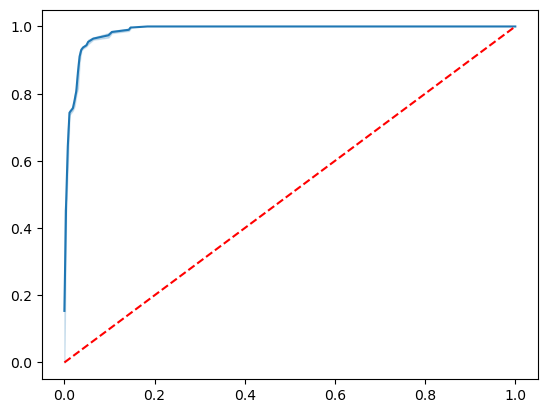

In [222]:
recta_x = [i * 0.01 for i in range(101)]
recta_y = recta_x
sns.lineplot(x = especificidad_inv, y = sensibilidad)
sns.lineplot(x = recta_x, y = recta_y, ls = "--", c = "r")

In [228]:
fpr, tpr, _ = roc_curve(y_test, y_pred_proba) # FPR (False Positive Rate) 1-Especificidad y TPR (True Positive Rate) Sensibilidad
# Calcular area bajo la curva ROC
roc_auc = auc(fpr, tpr)  # Área bajo la curva (AUC)
roc_auc

0.9870152354570637

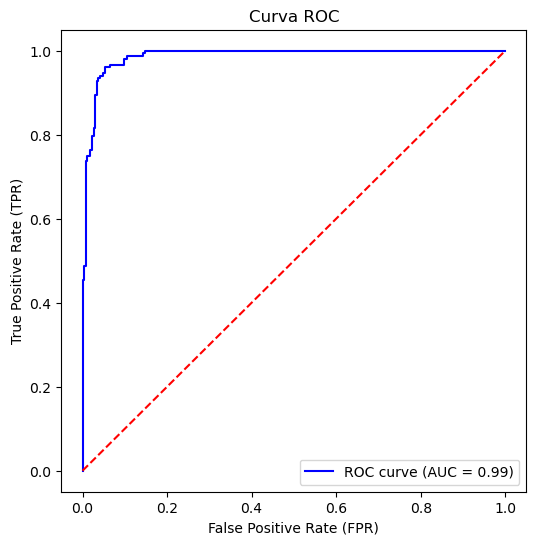

In [230]:
# Graficar la Curva ROC
plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='red')  # Línea aleatoria
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("Curva ROC")
plt.legend()
plt.show()

15. Calcular valor de área bajo la curva de ROC

In [233]:
roc_auc_score(y_test, y_pred_proba)

0.9870152354570637

In [235]:
# Calcular area bajo la curva ROC
roc_auc = auc(fpr, tpr)  # Área bajo la curva (AUC)
roc_auc

0.9870152354570637

# Prueba de sobrevivencia

In [246]:
X_train.head(1)

,Age,Fare,Pclass_2,Pclass_3,Embarked_Q,Embarked_S,Sex_male,IsMinor
0,22.0,7.25,False,True,False,True,True,0


In [248]:
modelo.predict([[28, 12, True, False, False, True, False, 0]])

C:\Users\user\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

1! sobrevivimos